Полносвязная сетка для распознавания крестиков и ноликов

### Задание

Самостоятельно напишите нейронную сеть, которая может стать составной частью системы бота для игры в "Крестики-нолики". Используя подготовленную базу изображений, создайте и обучите нейронную сеть, распознающую две категории изображений: крестики и нолики. Добейтесь точности распознавания более 95% (accuracy)


In [ ]:
# Подключение класса для создания нейронной сети прямого распространения
from tensorflow.keras.models import Sequential 
# Подключение класса для создания полносвязного слоя
from tensorflow.keras.layers import Dense 
# Подключение оптимизатора
from tensorflow.keras.optimizers import Adam 
# Подключение утилит для to_categorical
from tensorflow.keras import utils 
# Подключение библиотеки для загрузки изображений
from tensorflow.keras.preprocessing import image 
# Подключение библиотеки для работы с массивами
import numpy as np
# Подключение модуля для работы с файлами
import os
# Подключение библиотек для отрисовки изображений
import matplotlib.pyplot as plt 
from PIL import Image 
# Вывод изображения в ноутбуке, а не в консоли или файле
%matplotlib inline 

In [ ]:
# Загрузка датасета из облака
import gdown
gdown.download('https://storage.googleapis.com/datasets_ai/Bas%D0%B5Unit/1_intro/hw_pro.zip', None, quiet=True)

'hw_pro.zip'

In [ ]:
# Распаковываем архив hw_light.zip в папку hw_light
!unzip -q hw_pro.zip

In [ ]:
# Путь к директории с базой
base_dir = '/content/hw_pro'
# Создание пустого списка для загрузки изображений обучающей выборки
x_train = []
# Создание списка для меток классов
y_train = []
# Задание высоты и ширины загружаемых изображений
img_height = 20
img_width = 20
# Перебор папок в директории базы
for patch in os.listdir(base_dir):
    # Перебор файлов в папках
    for img in os.listdir(base_dir + '/' + patch):
        # Добавление в список изображений текущей картинки
        x_train.append(image.img_to_array(image.load_img(base_dir + '/' + patch + '/' + img,
                                                         target_size=(img_height, img_width),
                                                         color_mode='grayscale')))
        # Добавление в массив меток, соответствующих классам
        if patch == '0':
            y_train.append(0)
        else:
            y_train.append(1)
# Преобразование в numpy-массив загруженных изображений и меток классов
x_train = np.array(x_train)
y_train = np.array(y_train)
# Вывод размерностей
print('Размер массива x_train', x_train.shape)
print('Размер массива y_train', y_train.shape)

Размер массива x_train (102, 20, 20, 1)
Размер массива y_train (102,)


In [ ]:
#x_train = x_train.reshape(x_train.shape[0], -1)  
y_train = utils.to_categorical(y_train, 2)

In [ ]:
import random
index=np.array(range(np.shape(x_train)[0]))
random.shuffle(index)
x_train=x_train[index]
y_train=y_train[index]

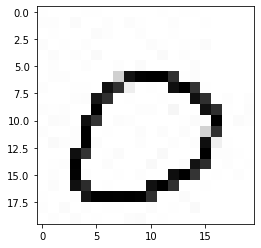

In [ ]:
plt.imshow(x_train[45,:,:,0], cmap='gray')

In [ ]:
import keras

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
10/10 [==============================] - 1s 29ms/step - loss: 68.6668 - accuracy: 0.5495 - val_loss: 5.3932 - val_accuracy: 0.6364
Epoch 2/100
10/10 [==============================] - 0s 12ms/step - loss: 1.9790 - accuracy: 0.8352 - val_loss: 23.1769 - val_accuracy: 0.4545
Epoch 3/100
10/10 [==============================] - 0s 12ms/step - loss: 21.4765 - accuracy: 0.5714 - val_loss: 5.0542 - val_accuracy: 0.7273
Epoch 4/100
10/10 [==============================] - 0s 12ms/step - loss: 0.6688 - accuracy: 0.9341 - val_loss: 6.4804e-06 - val_accuracy: 1.0000
Epoch 5/100
10/10 [==============================] - 0s 15ms/step - loss: 0.1948 - accuracy: 0.9890 - val_loss: 4.9742e-06 - val_accuracy: 1.0000
Epoch 6/100
10/10 [==============================] - 0s 13ms/step - loss: 0.3577 - accuracy: 0.9670 - val_loss: 1.3005e-07 - val_accuracy: 1.0000
Epoch 7/100
10/10 [==============================] - 0s 13ms/step - loss: 0.2263 - accuracy: 0.9670 - val_loss: 0.0000e+00 - val_accu

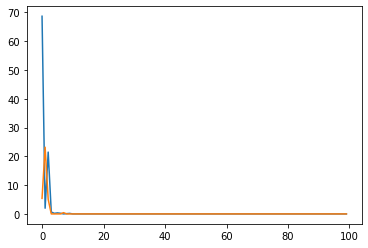

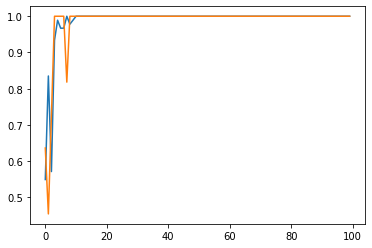

In [ ]:

inputs_x = keras.Input(shape=np.shape(x_train[0]))
dataSize=np.shape(x_train)[0]
trainSize=int(dataSize*0.9)

x1 = keras.layers.Convolution2D(40, 3, activation="relu")(inputs_x)
x1 = keras.layers.Flatten()(x1)
x1 = keras.layers.Dense(100, activation='relu')(x1)
x1 = keras.layers.Dense(2, activation='softmax')(x1)
model = keras.Model(inputs=inputs_x, outputs=x1)
adamopt=Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='categorical_crossentropy',optimizer=adamopt,metrics=['accuracy'])
history = model.fit(x=x_train[:trainSize], y=y_train[:trainSize],validation_data=(x_train[trainSize:], y_train[trainSize:]),epochs=100, batch_size=10)
plt.plot(history.history['loss'], label='loss train')
plt.plot(history.history['val_loss'], label='loss test')
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/300
19/19 [==============================] - 1s 11ms/step - loss: 165.2819 - accuracy: 0.5055 - val_loss: 162.7369 - val_accuracy: 0.3636
Epoch 2/300
19/19 [==============================] - 0s 3ms/step - loss: 127.0852 - accuracy: 0.5055 - val_loss: 116.5052 - val_accuracy: 0.3636
Epoch 3/300
19/19 [==============================] - 0s 3ms/step - loss: 90.6491 - accuracy: 0.5055 - val_loss: 69.0586 - val_accuracy: 0.3636
Epoch 4/300
19/19 [==============================] - 0s 3ms/step - loss: 53.0542 - accuracy: 0.5055 - val_loss: 29.8427 - val_accuracy: 0.4545
Epoch 5/300
19/19 [==============================] - 0s 4ms/step - loss: 26.8483 - accuracy: 0.5055 - val_loss: 7.0352 - val_accuracy: 0.7273
Epoch 6/300
19/19 [==============================] - 0s 3ms/step - loss: 16.8327 - accuracy: 0.6044 - val_loss: 3.6105 - val_accuracy: 0.8182
Epoch 7/300
19/19 [==============================] - 0s 4ms/step - loss: 14.7172 - accuracy: 0.6374 - val_loss: 2.8533 - val_accuracy: 0.81

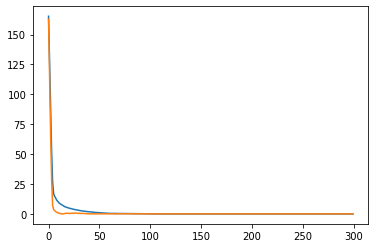

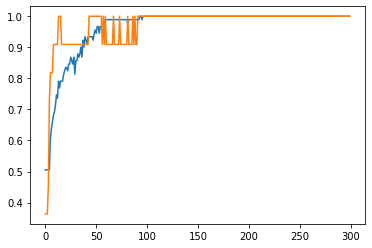

In [ ]:
inputs_x = keras.Input(shape=np.shape(x_train[0]))
dataSize=np.shape(x_train)[0]
trainSize=int(dataSize*0.9)

x1 = keras.layers.Flatten()(inputs_x)
x1 = keras.layers.Dense(100, activation='relu',kernel_regularizer=keras.regularizers.l2(0.00001))(x1)
x1 = keras.layers.Dense(100, activation='relu',kernel_regularizer=keras.regularizers.l2(0.00001))(x1)
x1 = keras.layers.Dense(10, activation='relu')(x1)
x1 = keras.layers.Dense(2, activation='softmax')(x1)
model = keras.Model(inputs=inputs_x, outputs=x1)
adamopt=Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='categorical_crossentropy',optimizer=adamopt,metrics=['accuracy'])
history = model.fit(x=x_train[:trainSize], y=y_train[:trainSize],validation_data=(x_train[trainSize:], y_train[trainSize:]),epochs=300, batch_size=5)
plt.plot(history.history['loss'], label='loss train')
plt.plot(history.history['val_loss'], label='loss test')
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()